In [21]:
import xarray as xr
import numpy as np
import xesmf
import matplotlib.pyplot as plt
import matplotlib as mpl
# Any import of metpy will activate the accessors
import glob
import pandas as pd
import scipy
import metpy
from metpy.interpolate import interpolate_to_points
import cmocean
import cartopy
import cartopy.crs as ccrs
import math
import cmaps
import cftime
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
from matplotlib.transforms import Affine2D
from matplotlib.colors import BoundaryNorm
from matplotlib.cm import get_cmap
import scipy.sparse as sps
import warnings

# Read Data bilinear 

In [22]:
var='Temp'
units='$\degree$C'
dirin='/data/ghervieux/NG_NMS'

DSb=xr.open_dataset(f'{dirin}/PnB_{var}.nc')
obsb=DSb['obs']
glob=DSb['GLORYS'].where(DSb['GLORYS']>0)
nepb=DSb['NEP'].where(DSb['NEP']>0)
depthb=DSb['depth']
timeb=DSb['time']

# Read Data NN

In [23]:
dirin='/data/ghervieux/NG_NMS_NN'

DSn=xr.open_dataset(f'{dirin}/PnB_{var}.nc')
obsn=DSn['obs']
glon=DSn['GLORYS'].where(DSn['GLORYS']>0)
nepn=DSn['NEP'].where(DSn['NEP']>0)
depthn=DSn['depth']
timen=DSn['time']

# Resample Seasonal

In [24]:
# Define stations vector
station_v=np.arange(1,8,1)

In [25]:
obsn=obsn.resample(time='QS-JAN').mean('time').assign_coords({'npts':station_v})
nepn=nepn.resample(time='QS-JAN').mean('time').assign_coords({'npts':station_v})
glon=glon.resample(time='QS-JAN').mean('time').assign_coords({'npts':station_v})


obsb=obsb.resample(time='QS-JAN').mean('time').assign_coords({'npts':station_v})
nepb=nepb.resample(time='QS-JAN').mean('time').assign_coords({'npts':station_v})
glob=glob.resample(time='QS-JAN').mean('time').assign_coords({'npts':station_v})

# Anomaly

Aobsn=obsn.groupby('time.month')-obsn.groupby('time.month').mean('time')
Anepn=nepn.groupby('time.month')-nepn.groupby('time.month').mean('time')
Aglon=glon.groupby('time.month')-glon.groupby('time.month').mean('time')

Aobsb=obsb.groupby('time.month')-obsb.groupby('time.month').mean('time')
Anepb=nepb.groupby('time.month')-nepb.groupby('time.month').mean('time')
Aglob=glob.groupby('time.month')-glob.groupby('time.month').mean('time')

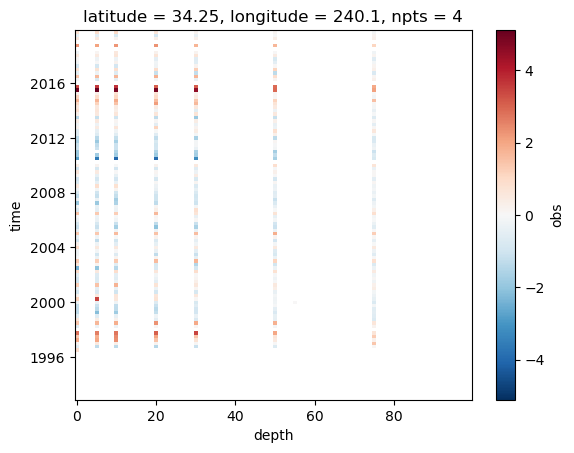

In [26]:
Aobsb.sel(npts=4).plot()

[ 0  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5
 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30
 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0
  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 55 75  0  5 10
 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50
 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5
 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30
 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0
  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20
 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75
  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10
 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50
 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30 50 75  0  5
 10 20 30 50 75  0  5 10 20 30 50 75  0  5 10 20 30

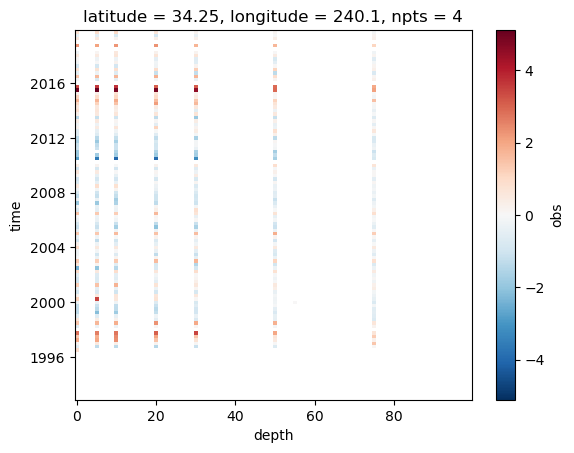

In [27]:
Aobsb.sel(npts=4).plot()
idt,idd=np.where(np.isnan(Aobsb.sel(npts=4))==False)
print(idd)
#Aobsb.depth[idd].data

/tmp/ipykernel_2454627/1730853918.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ix].set_yticklabels(axs[ix].get_yticklabels(),fontsize=16)
/tmp/ipykernel_2454627/1730853918.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[ix].set_xticklabels(axs[ix].get_xticklabels(),fontsize=16)


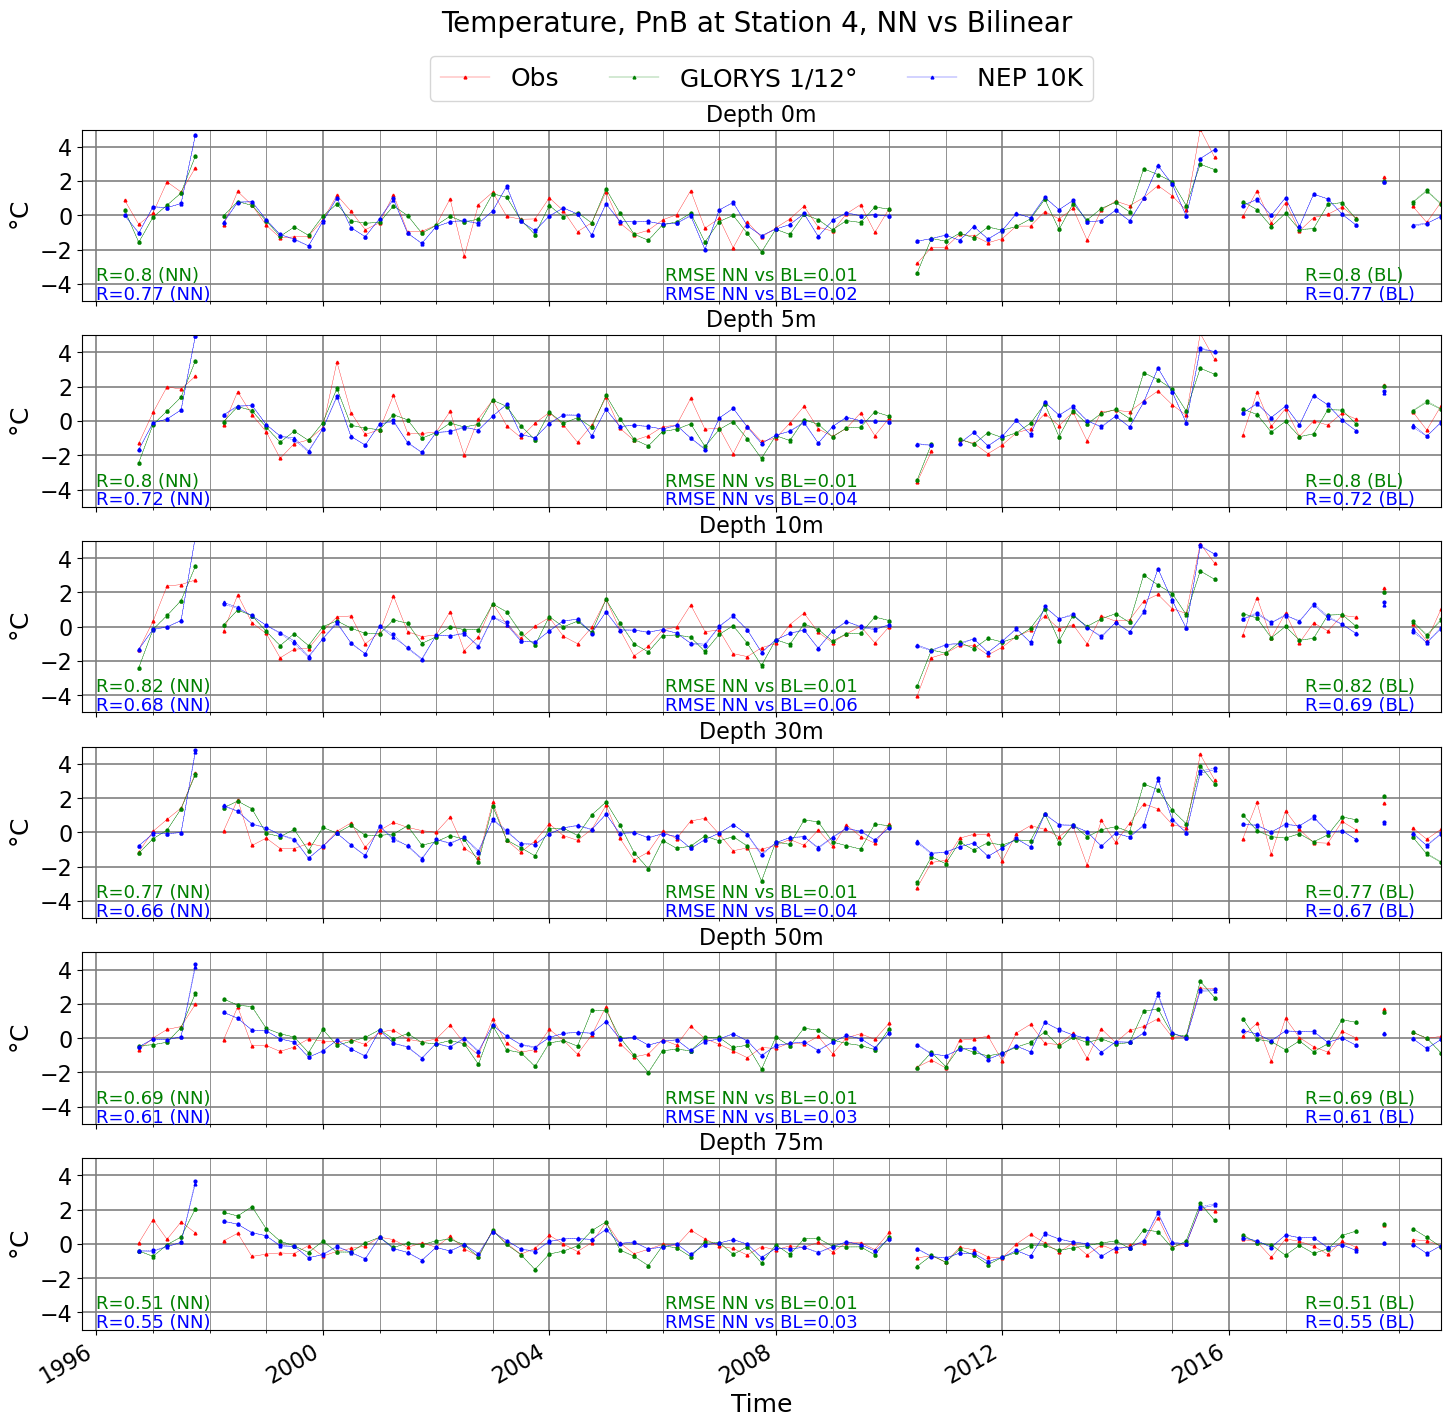

In [50]:
vdepth=[0,  5, 10, 30, 50, 75]
year=Aobsn.indexes['time']
fig, axs =\
plt.subplots(nrows=len(vdepth),ncols=1,
                        figsize=(18,15),clear=True)
plt.subplots_adjust(bottom=0.1, hspace=0.2,right=0.88, top=0.9)
axs=axs.flatten()
for id in range(0,len(vdepth)):
  On=Aobsn.sel(npts=4,depth=vdepth[id])
  Gn=Aglon.sel(npts=4,depth=vdepth[id])
  Nn=Anepn.sel(npts=4,depth=vdepth[id])
  Ob=Aobsb.sel(npts=4,depth=vdepth[id])
  Gb=Aglob.sel(npts=4,depth=vdepth[id])
  Nb=Anepb.sel(npts=4,depth=vdepth[id])
  xx1n=np.where(np.isnan(Gn)==False)[0]
  xx2n=np.where(np.isnan(Nn)==False)[0]
  rmse_g=np.round(np.sqrt(((Gn-Gb)**2).mean().data),2)
  rmse_n=np.round(np.sqrt(((Nn-Nb)**2).mean().data),2)
  cor_Gn=np.round(np.corrcoef(On[xx1n],Gn[xx1n])[0][1],2)
  cor_Nn=np.round(np.corrcoef(On[xx2n],Nn[xx2n])[0][1],2)
  xx1b=np.where(np.isnan(Gb)==False)[0]
  xx2b=np.where(np.isnan(Nb)==False)[0]
  cor_Gb=np.round(np.corrcoef(Ob[xx1b],Gb[xx2b])[0][1],2)
  cor_Nb=np.round(np.corrcoef(Ob[xx2b],Nb[xx2b])[0][1],2)


  On.plot.line(ax=axs[id],c='r',marker='^',markersize=2,lw=0.25,label='Obs')
  Gn.plot.line(ax=axs[id],c='green',marker='^',markersize=2,lw=0.25,label='GLORYS $1/12\degree$')
  Nn.plot.line(ax=axs[id],c='blue',marker='^',markersize=2,lw=0.25,label='NEP 10K')
  Gb.plot.line(ax=axs[id],c='green',marker='o',markersize=2,ls='--',lw=0.25)
  Nb.plot.line(ax=axs[id],c='blue',marker='o',markersize=2,ls='--',lw=0.25)
  axs[id].text(0.9, 0.12,f'R={cor_Gb} (BL)',c='green',transform=axs[id].transAxes,fontsize=13)
  axs[id].text(0.9, 0.01,f'R={cor_Nb} (BL)',c='blue',transform=axs[id].transAxes,fontsize=13)
  axs[id].text(0.5, 0.12,f'RMSE NN vs BL={rmse_g}',c='green',transform=axs[id].transAxes,fontsize=13,ha='center')
  axs[id].text(0.5, 0.01,f'RMSE NN vs BL={rmse_n}',c='blue',transform=axs[id].transAxes,fontsize=13,ha='center')
  axs[id].text(0.01, 0.12,f'R={cor_Gn} (NN)',c='green',transform=axs[id].transAxes,fontsize=13)
  axs[id].text(0.01, 0.01,f'R={cor_Nn} (NN)',c='blue',transform=axs[id].transAxes,fontsize=13)
axs[0].legend(loc='center',ncols=3,\
                       bbox_to_anchor=(0.5,1.3), prop={'size': 18})
for ix in range(0,len(vdepth)):
  axs[ix].grid()
  axs[ix].set_ylim(-5.,5.)
  axs[ix].set_xlim(year[11],year[-1])
  axs[ix].set_title(f'Depth {vdepth[ix]}m',fontsize=16)
  axs[ix].set_ylabel('$\degree$C',size=18)
  axs[ix].xaxis.set_minor_locator(mdates.YearLocator(month=1))
  axs[ix].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
  axs[ix].grid(which='major', color='grey', linewidth=1.2)
  axs[ix].grid(which='minor', color='grey', linewidth=0.6)
  #axs[ix].set_yticks(axs[ix].get_yticks()[::2])
  axs[ix].set_yticklabels(axs[ix].get_yticklabels(),fontsize=16)
  if ix==5:
    axs[ix].set_xticklabels(axs[ix].get_xticklabels(),fontsize=16)
    axs[ix].set_xlabel('Time',size=18)
  else:
    axs[ix].set_xticklabels('',fontsize=16)
    axs[ix].set_xlabel('',size=18)
plt.suptitle(f'Temperature, PnB at Station 4, NN vs Bilinear',fontsize=20)
outfile=f'PLOTS/PnB_A{var}_station4_timeseries_interptest_resample.png'
plt.savefig(outfile, dpi=150, facecolor='w', edgecolor='w', orientation='portrait')

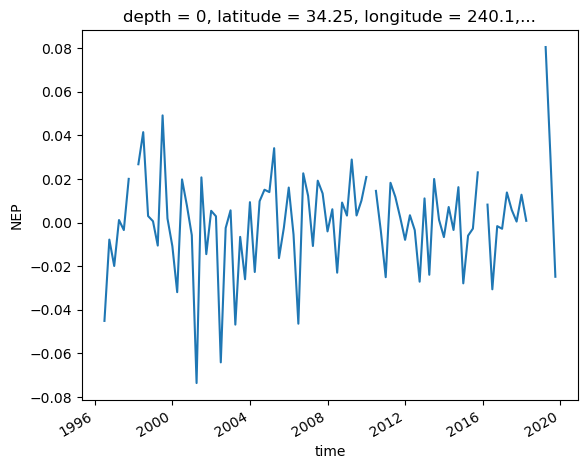

In [45]:
xxx=Anepn.sel(npts=4,depth=vdepth[0])-Anepb.sel(npts=4,depth=vdepth[0])
xxx.plot()
